In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
matplotlib.rcParams['figure.figsize'] = (12, 10) # set default figure size, 8in by 6in

# The Curse of Dimensionality

# Main Approaches for Dimensionality Reduction

## Projection

## Manifold Learning

# Principal Component Analysis (PCA)

First I'll create a random data set that looks similar to textbook 8-7 by generating data that is randomly
distributed on two features, then we rotat it 45 degrees using a linear algebra transformation.

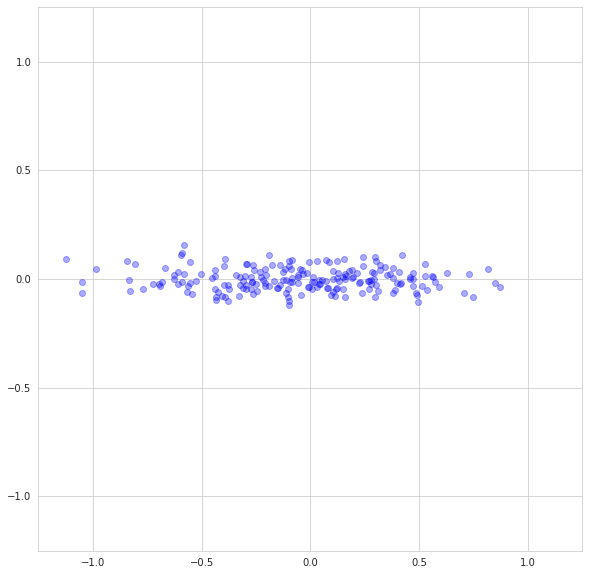

In [3]:
# number of samples to generate
m = 200

# array to hold randomly generated data
X = np.empty((m, 2))

# standard deviation of x_1 dimension is large
x_1_scale = 0.4
X[:,0] = np.random.normal(loc=0.0, scale=x_1_scale, size=m)

# standard deviation of x_2 dimension is small
x_2_scale = 0.05
X[:,1] = np.random.normal(loc=0.0, scale=x_2_scale, size=m)

# show the results so far
plt.plot(X[:,0], X[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box');
#plt.grid();

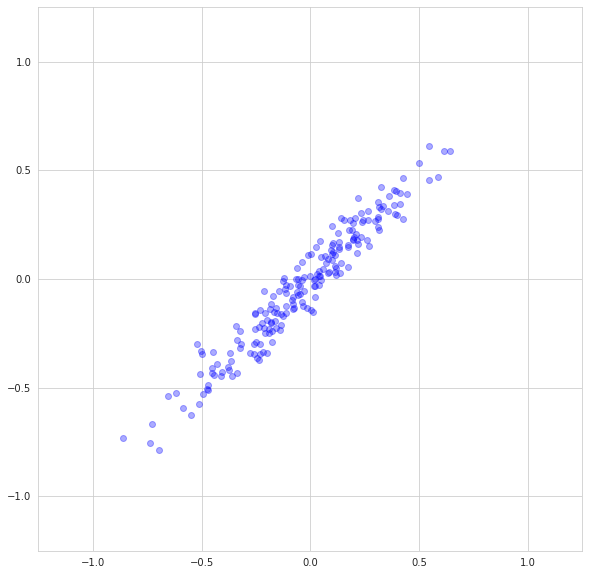

In [4]:
# use a little linear algebra, create a rotation matrix and use it to rotate 45 degrees
theta = np.radians(-45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c,-s), (s, c)))

# will rotate points by the degrees given
X = np.dot(X, R)

# show the results after rotation
plt.plot(X[:,0], X[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box');
#plt.grid();

In [5]:
# apply PCA,project to 2 dimensions, but this will undo the rotation
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X2d = pca.fit_transform(X)

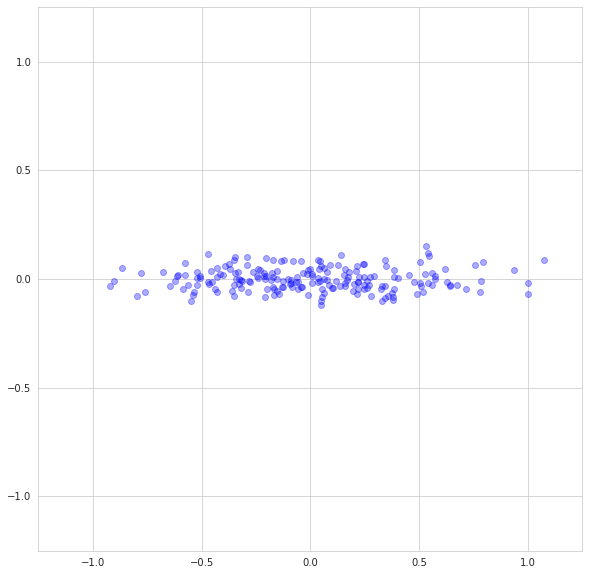

In [6]:
# show the results after PCA,
plt.plot(X2d[:,0], X2d[:,1], 'bo', alpha=0.33)
plt.xlim(-1.25, 1.25)
plt.ylim(-1.25,1.25)
plt.gca().set_aspect('equal', adjustable='box');
#plt.grid();

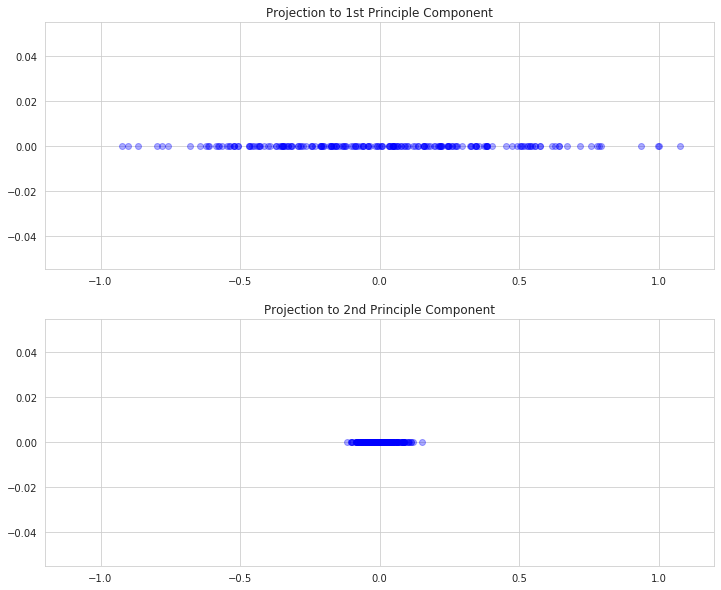

In [7]:
# we can use the .components_ to access the principle component projections
# visualze first principle component project to a 1D hyperplane (to a line)
plt.subplot(2,1,1)
plt.plot(X2d[:,0], np.zeros(m), 'bo', alpha=0.33)
plt.xlim(-1.2, 1.2)
plt.title("Projection to 1st Principle Component");
#plt.grid();

# visualze second principle component project to a 1D hyperplane (to a line)
plt.subplot(2,1,2)
plt.plot(X2d[:,1], np.zeros(m), 'bo', alpha=0.33)
plt.xlim(-1.2, 1.2)
plt.title("Projection to 2nd Principle Component");
#plt.grid();

# In Depth: Principal Component Analysis

[reference](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

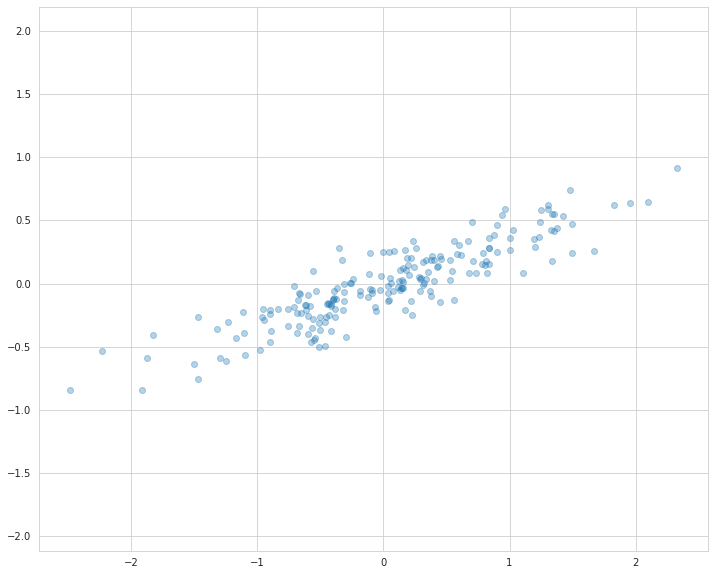

In [8]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1], alpha=0.33)
plt.axis('equal');

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

In [10]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [11]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


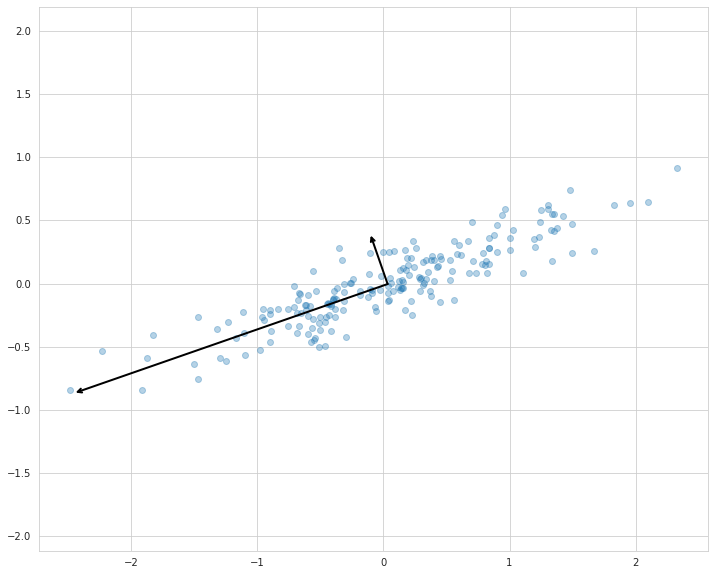

In [12]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    color='black',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.33)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

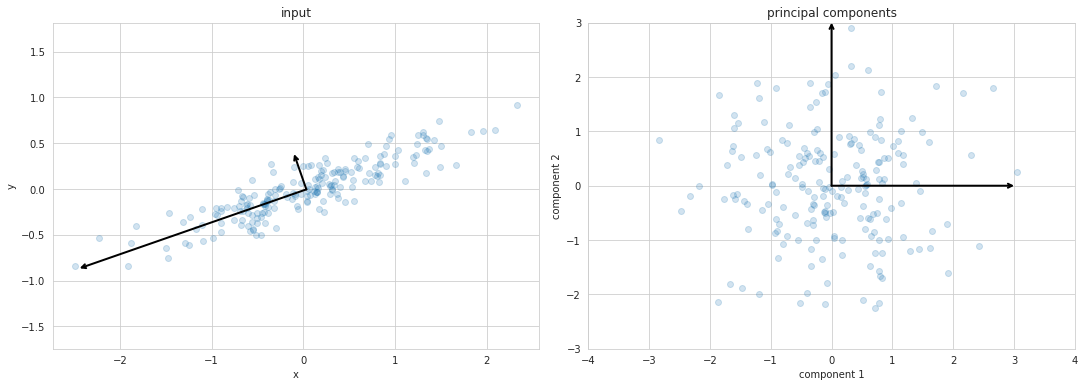

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.xlabel('x')
plt.ylabel('y')
plt.title('input')

# plot principal components
X_pca = pca.transform(X)
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
#plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('principal components');
draw_vector([0, 0], [0, 3])
draw_vector([0, 0], [3, 0])


In [14]:
# perform pca by hand

# first perform mean normalization and scaling
mu = np.mean(X, axis=0)
sd =  np.std(X, axis=0)

X_norm = X - mu
X_norm_scaled = (X - mu) / sd

# extract m, number of samples
# extract n, number of features/dimensions
m,n = X_norm_scaled.shape

# compute covariance matrix Sigma
Sigma = (1.0 / m) * np.dot(X_norm_scaled.T, X_norm_scaled)
#print(Sigma.shape)
#print(Sigma)


# perform singular value decomposition
U, S, V = np.linalg.svd(Sigma)
print(U.shape)
print(S.shape)
print(V.shape)

# U vectors represent the transformed space
# should be equivalent to pca.components_
print(U)

# compoute the pca.transform
X_pca = np.dot(X_norm_scaled, U)

(2, 2)
(2,)
(2, 2)
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


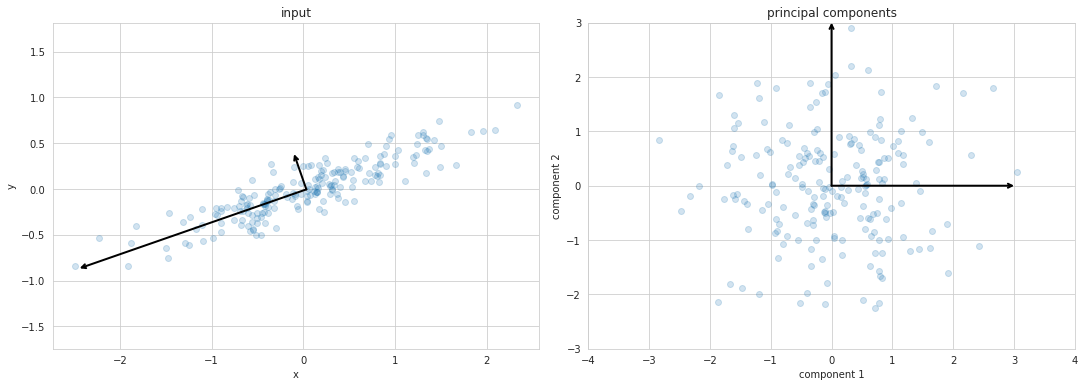

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.xlabel('x')
plt.ylabel('y')
plt.title('input')

# plot principal components
X_pca = pca.transform(X)
plt.subplot(1,2,2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
#plt.axis('equal')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('principal components');
draw_vector([0, 0], [0, 3])
draw_vector([0, 0], [3, 0])


In [16]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


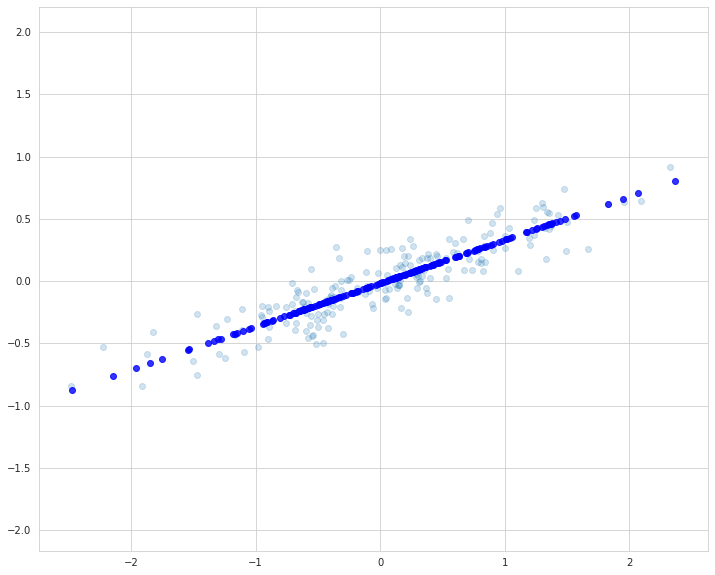

In [17]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='blue')
plt.axis('equal');


## PCA for visualization: Hand-written digits

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [19]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


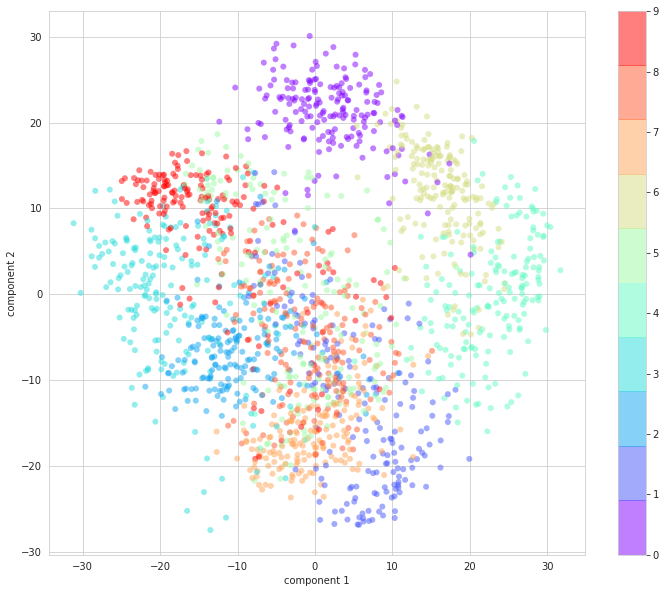

In [20]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

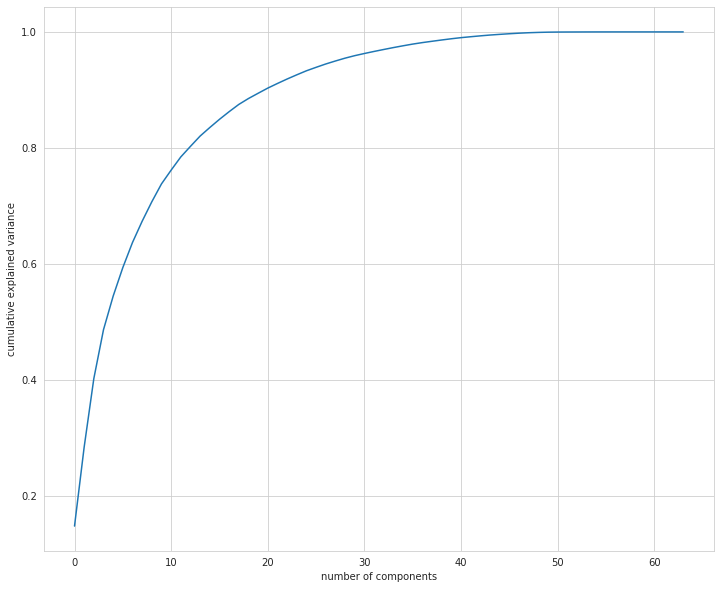

In [21]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

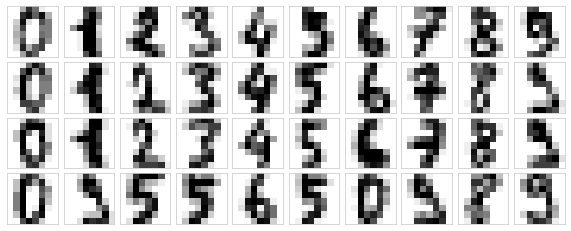

In [22]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)



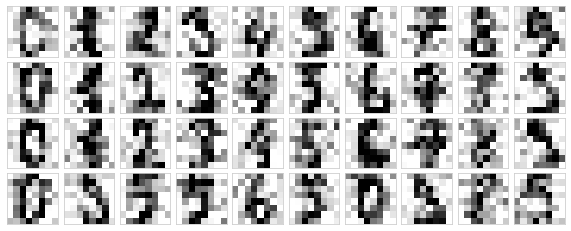

In [23]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [24]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

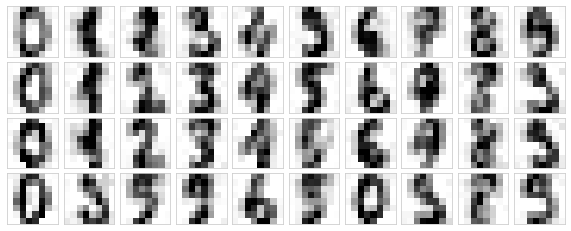

In [25]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Example: Eigenfaces

In [26]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [27]:
pca = PCA(150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

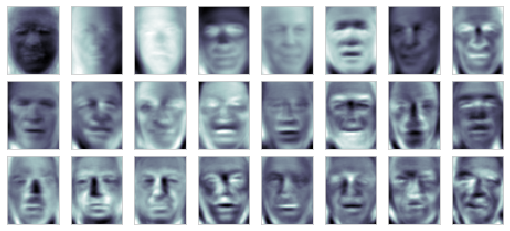

In [28]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

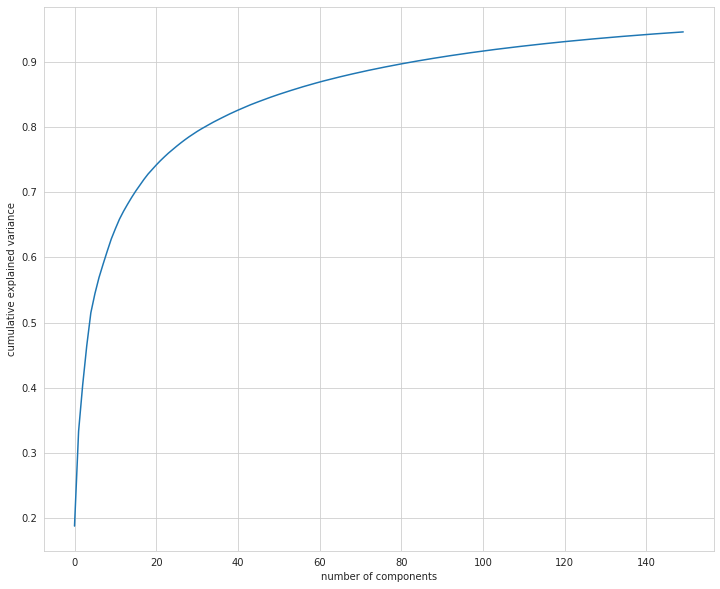

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [30]:
# Compute the components and projected faces
pca = PCA(150, svd_solver='randomized', whiten=True).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

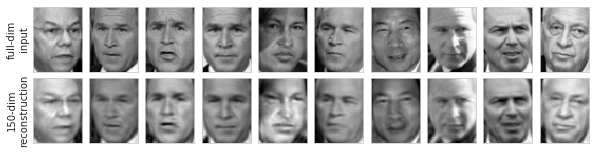

In [31]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');